## Etiquetado de datos ##

In [5]:
#pip install pysentimiento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Utilizamos **PySentimiento** como herramienta para el etiquetado automatico de tweets. Para utilizar PySentimiento debemos invocar la funcionalidad de **sentiment** en idioma **español**.

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

In [29]:
import datetime
df_final = pd.read_csv('DF_pandemiaIE.csv', delimiter=',')
#df = df.iloc[:100,:]
#Si se necesita, filtar por anho
#df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')
#df_final = df_final[df_final['date'].dt.year == 2022]
(df_final.username.value_counts())

EsSaludPeru        1114
Minsa_Peru         1050
victorzamora        952
SuSaludPeru         831
SISPeruOficial      828
CMP_PERU            789
ErnesBustamante     774
EdMalagaTrillo      742
drhuerta            571
A_Aguinaga          427
CayetanoHeredia     402
ougarteu            247
HCevallosFlores     144
maguina_ciro          4
Name: username, dtype: int64

In [17]:
df_final['len_sentence'] = df_final['len_sentence'].astype(int)
df_final['nlikes'] = df_final['nlikes'].astype(int)
df_final['len_word'] = df_final['len_word'].astype(int)

In [24]:
def cambiar_target(x):
    if x =='POS':
        return 1
    elif x =='NEG':
        return 0
    elif x =='NEU':
        return 2
    
def combinar_columnas(lst1, lst2):
    df_aux = pd.DataFrame(columns = ['username','target','count'])
    lst_user = []
    lst_target = []
    for i in lst1:
        for j in lst2:
            lst_user.append(i)
            lst_target.append(j)
            
    df_aux['username'] = lst_user
    df_aux['target'] = lst_target
    df_aux['count'] = np.zeros(len(lst_user),dtype=int)
    
    return df_aux

def colocar_target(a,b,c):
    list1 = [a,b,c]
    #print(list1)
    tmp = max(list1)
    #print(temp)
    index = list1.index(tmp)
    
    if index == 0:
        return 'POS'
    elif index == 1:
        return 'NEG'
    else:
        return 'NEU'
    
def definir_scores(df):
    df['POS'] = np.zeros(len(df))
    df['NEG'] = np.zeros(len(df))
    df['NEU'] = np.zeros(len(df))
    df['POS'], df['NEG'], df['NEU'] = execute_scores(df)
    return df

#El metodo **execute_scores** invoca la funcion de prediccion para cada tweet, 
#devolviendo el score para cada el sentimiento POS, NEG, NEU segun corresponda.
def execute_scores(df):
    list_POS = []
    list_NEG = []
    list_NEU = []
    for index, row in df.iterrows():
        #print(index)
        list_scores = analyzer.predict(row['tweet'])
    #print(list_scores)
        list_POS.append(list_scores.probas['POS'])
        list_NEG.append(list_scores.probas['NEG'])
        list_NEU.append(list_scores.probas['NEU'])
    return list_POS, list_NEG, list_NEU

def grafico_por_user(df):
    #n_by_user = df.groupby(["username","target"], as_index=False)["POS"].count()
    #print(df)
    plt.figure(figsize=(40,45))
    user = np.unique(df['username'])
    #print(user)
    POS = df[df['target'] == 'POS']['POS'].to_list()
    #print(POS.to_list())
    NEG = df[df['target'] == 'NEG']['POS'].to_list()
    #print(len(POS), len(NEG))
    NEU = df[df['target'] == 'NEU']['POS']
    print(len(POS),len(NEG), len(NEU))
    indice = np.arange(len(user))
    print(indice) 
    #plt.figure(figsize=(20, 6))
    ## Se crean las primeras barras
    plt.bar(indice, POS, label='POS')
 
    ## Se crean las segundas barras y se apilan sobre las primeras
    plt.bar(indice, NEG, label='NEG',  bottom=POS)
    plt.bar(indice, NEU, label='NEU',  bottom=NEG)
        
    #np.arange(0.02,1.02,0.02)

    plt.xticks(indice, user, fontsize=42, rotation=50)
    plt.yticks(fontsize=42)
    #plt.ylabel("User",fontsize=40)
    plt.ylabel("Numero de tweets por categoria",fontsize=62)
    plt.xlabel("Usernames",fontsize=62)
    #plt.title('Participantes por género')
    plt.legend(fontsize=62)
    plt.savefig("dist_username_pandF.pdf",format='pdf', dpi=1000)
    plt.show()
    
def plot_general(df):
    n_by_target = df.groupby(["target"], as_index=False)["POS"].count()
    #print(n_by_target)
   
    colores = ['blue','orange','green']
    ## Declaramos valores para el eje x
    eje_x = ['Negativo', 'Neutro','Positivo']

    ## Declaramos valores para el eje y
    eje_y = n_by_target['POS'].to_list()
    #eje_y = [1431, 819, 774]
    
    #total = n_by_target.sum(axis=1)
    ## Creamos Gráfica
    plt.bar(eje_x,eje_y,color= colores)

    ## Legenda en el eje y
    plt.ylabel('Cantidad de tweets')

    ## Legenda en el eje x
    plt.xlabel('Sentimiento')
    #plt.legend(colores, loc ="upper right")
    ## Título de Gráfica
    #plt.title('Sentimiento de tweet')

    ## Mostramos Gráfica
    plt.savefig("fig_pandemia_ini.eps",format='eps', dpi=1000)
    plt.show()

*Mediante la funcion **colocar_target** etiquetamos el sentimiento de cada tweets de acuerdo a los mayor score obtenido*

In [31]:
#DF_target = definir_scores(df_final)
df_final['target'] =  df_final.apply(lambda x: colocar_target(x['POS'], x['NEG'], x['NEU']),axis=1)
#DF_target.to_csv('DF_politicoT')

Agrupamos los usuarios mediante la funcion **groupby** para obtener la distribucion de los tweets por categoria (POS, NEG, NEU). Elsiguiente grafico muestra la distribucion inicial de los tweets:

14 14 14
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


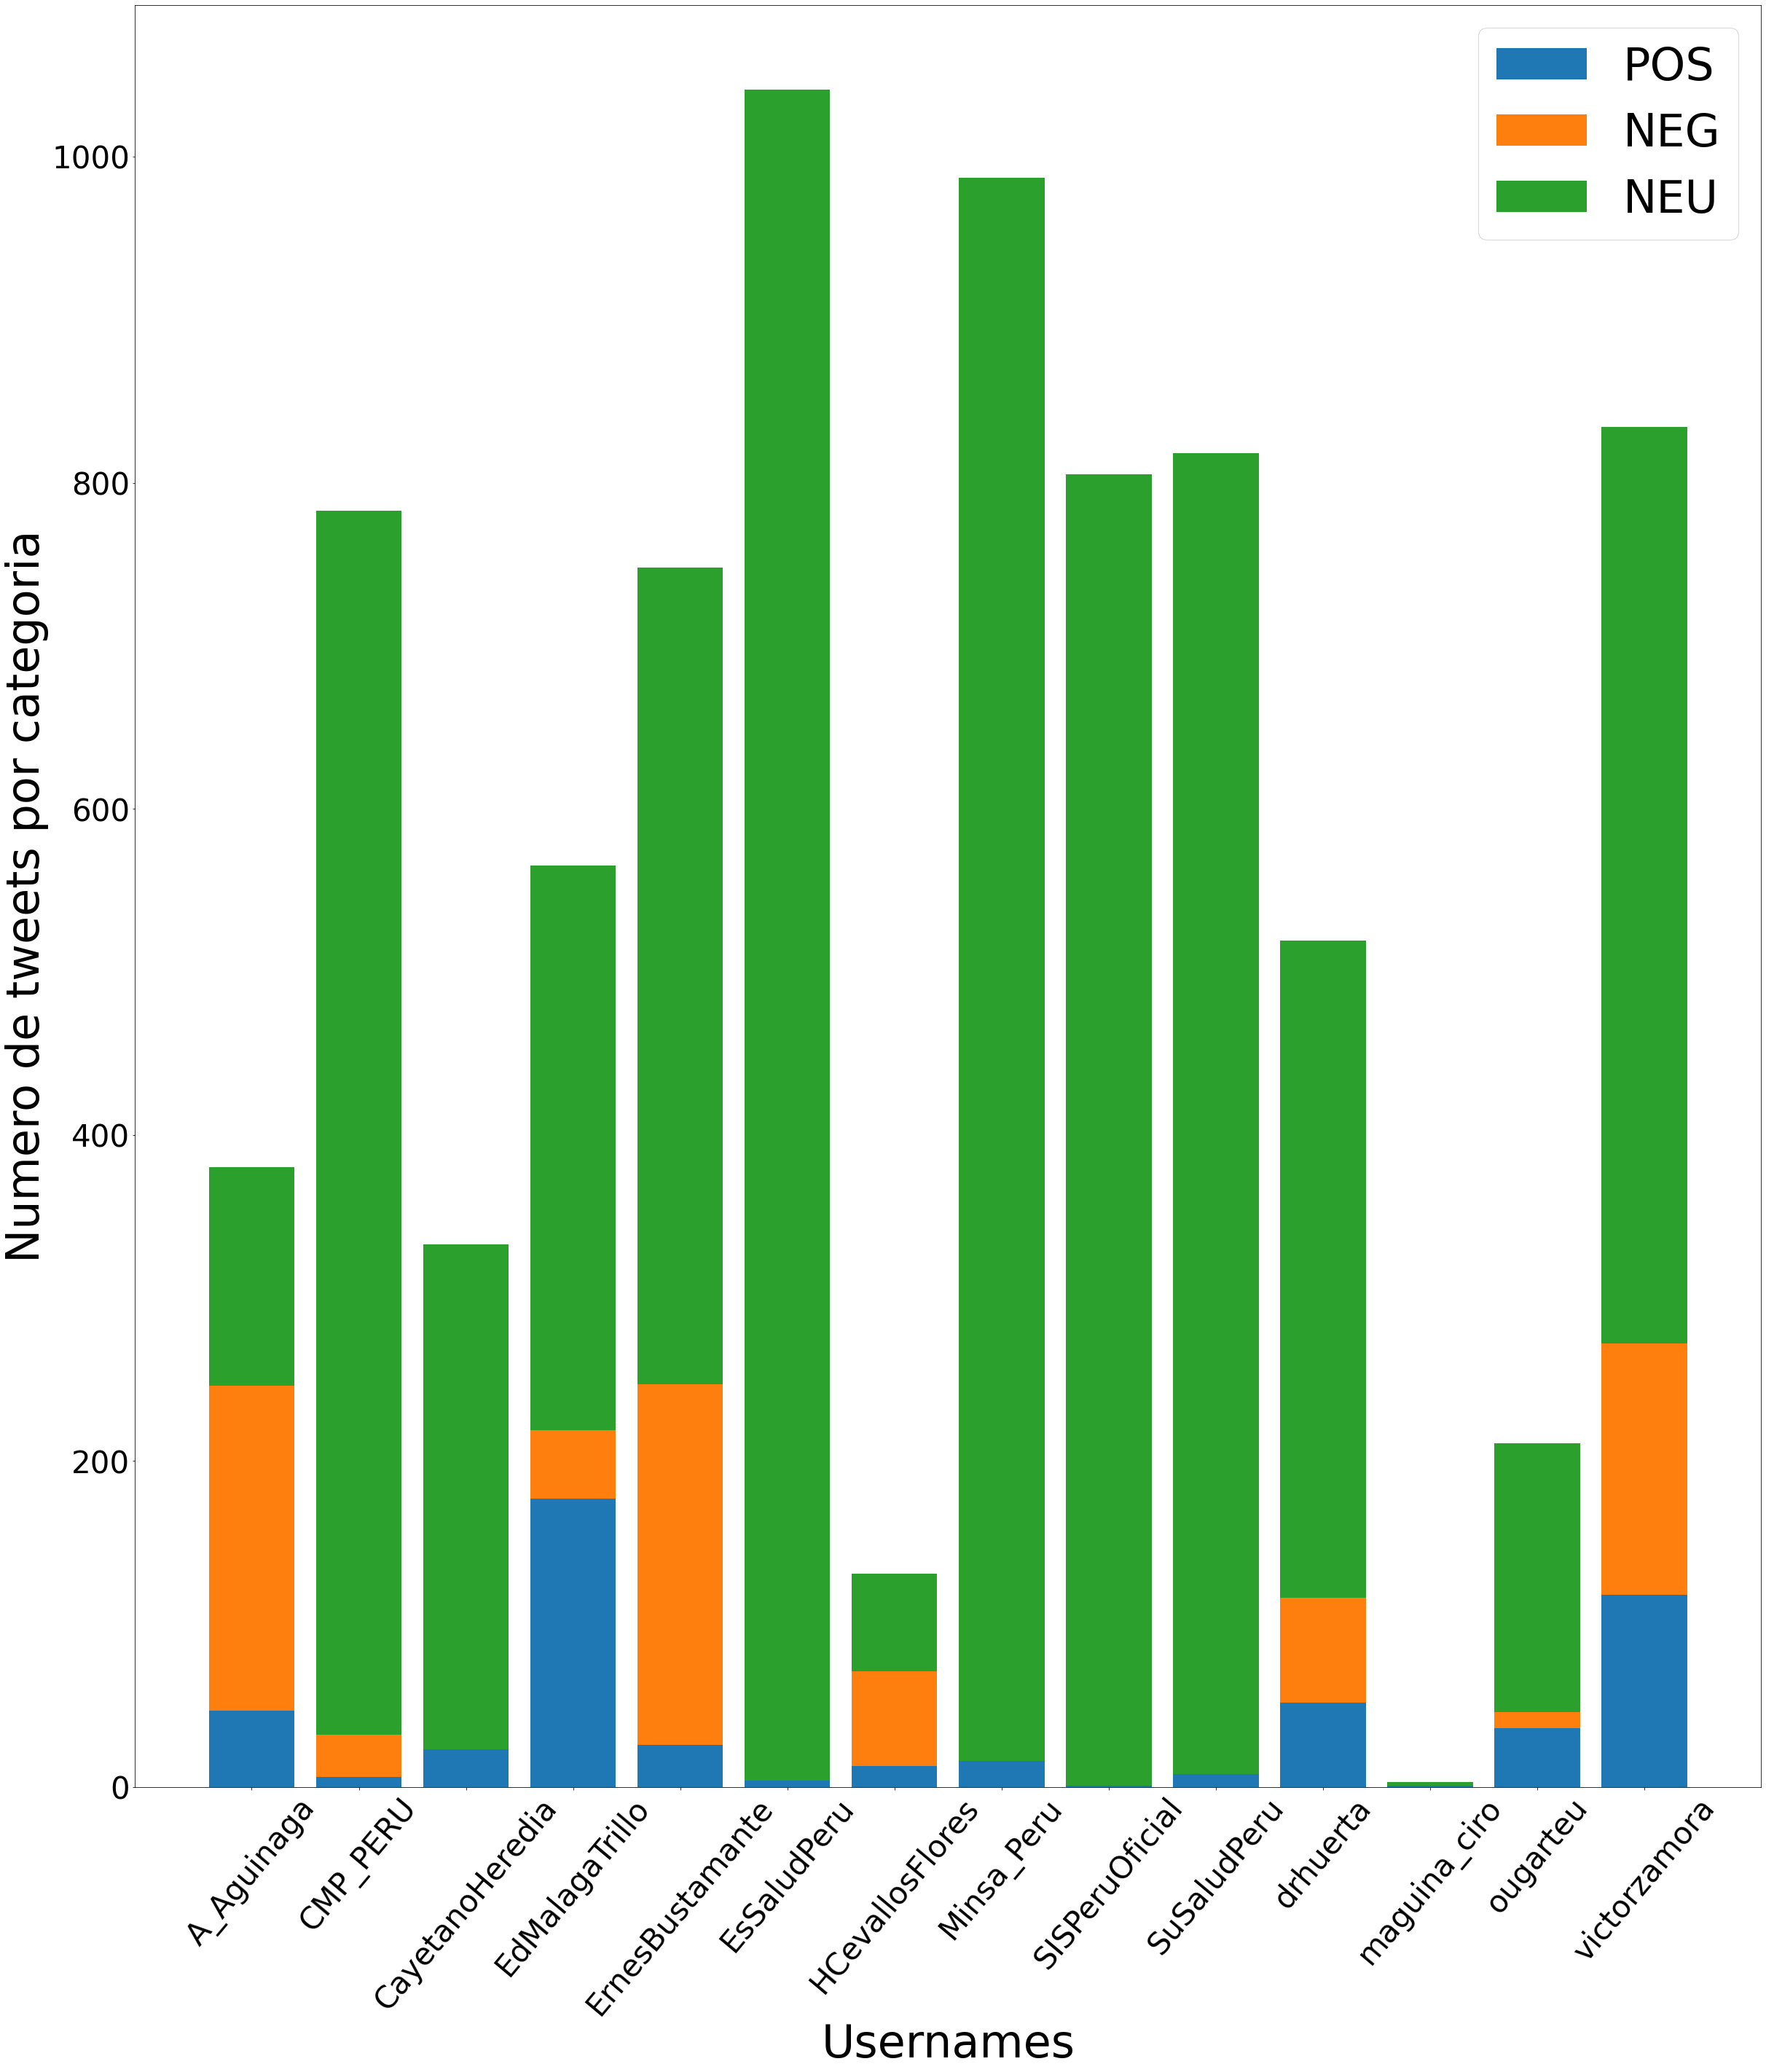

In [67]:
n_by_user = df_final.groupby(["username","target"], as_index=False)["POS"].count()
#print(n_by_user)
#df_completo = combinar_columnas(np.unique(DF_target['username']),['POS','NEG','NEU'])
#print(df_completo)
#df_final = pd.merge(df_completo, n_by_user, how='left', on=['username','target'])[['username', 'target', 'POS']]
#print(df_final)
#print(df_final)
grafico_por_user(n_by_user)

## Balanceamento de datos ##

In [18]:
DF_target = df_final
#DF_target.target.value_counts()

NEU    10378
NEG     3739
POS     1109
Name: target, dtype: int64

*Seleccionamos los tweets con mayor score para la categoria NEU y NEG, mantenemos los de POS.*

In [8]:
DF_target = DF_target[(DF_target['NEU'] > 0.95) | (DF_target['NEG'] > 0.95) | (DF_target['target'] == 'POS') ]
DF_target['target'].value_counts()
#(df_exp['username'] == 'DanielU

NEU    3242
NEG    2012
POS    1109
Name: target, dtype: int64

*Realizamos una limpieza para obtener un dataset balanceado, de acuerdo a lo siguiente: **(1)** Aquellos oraciones que poseían 0 likes son descartados, 
debido a que los likes son un indicador de relevancia dentro de una red social. **(2)** Aquellas oraciones que poseıan menos de 4 palabras eran descartadas para NEU y NEG, mientras que para POS son eliminados las oraciones que poseian menos de 3.*

In [19]:
def limpiar_df(df_original):
    indice_eliminado = []
    for i, row in df_original.iterrows():
        if row['nlikes'] == 0 :
            #print('aqui')
            indice_eliminado.append(i) 
        if row['target'] == 'NEG'  and row['len_word'] < 4 :
            indice_eliminado.append(i) 
        if row['target'] == 'NEU'  and row['len_word'] < 4 :
            indice_eliminado.append(i) 
        if row['target'] == 'POS'  and row['len_word'] < 3 :
            #print(df_original[i])
            indice_eliminado.append(i) 
  
    #print(len(indice_eliminado))
    unique_index = np.unique(indice_eliminado)
    #print(df_original[unique_index])
    df_original = df_original.drop(unique_index)
    #df_original = df_original[(df_original['NEU'] > 0.90) | (df_original['NEG'] > 0.90)]
    print(len(df_original))
    return df_original

df_exp = limpiar_df(DF_target)
conteo=Counter(df_exp['target'])
conteo

12438


Counter({'NEU': 8510, 'NEG': 2918, 'POS': 1010})

In [77]:
df_exp.to_csv('df_pandemia_score.csv')

**Tweets para revision:** Aquelos tweets que posean un score entre 0.5 y 0.6 son recopilados para ser verificados manualmente, debido a que estos tweets no tienen una reacon fuertemente definida para cada sentimiento.

In [11]:
#df_exp_ = pd.read_csv('df_pandemia_score.csv')

In [14]:
#df_finalC['target'] =  df_finalC.apply(lambda x: colocar_target(x['POS'], x['NEG'], x['NEU']),axis=1)
#plot_general(df_finalC)
#df_exp_

In [20]:
def tweets_para_revision(df,umbral_1, umbral_2):
    #df_original = df.copy()
    df_original = df.reset_index(drop = True)
    indice_revisado = []
    for i, row in df_original.iterrows():
        if row['POS'] < umbral_1 and row['POS'] > umbral_2 :
            indice_revisado.append(i) 
        if row['NEG'] < umbral_1 and row['NEG'] > umbral_2 :
            indice_revisado.append(i) 
        if row['NEU'] < umbral_1 and row['NEU'] > umbral_2 :
            indice_revisado.append(i) 
    print(len(df_original))
    df_revision = df_original.iloc[indice_revisado]
    print(len(df_revision))
    unique_index = np.unique(indice_revisado)
    df_original = df_original.drop(unique_index)
    print(len(df_original))
    
    return df_revision, df_original
#DF_target['target'].value_counts()

15226
906
14320


In [ ]:
df_rev, df_ori = tweets_para_revision(DF_target,0.60,0.50)

In [21]:
df_rev['target'].value_counts()
df_rev[['id','tweet_sentence','target']].to_excel('pand_rev.xlsx',index=False)

NEU    488
NEG    260
POS    158
Name: target, dtype: int64

In [40]:
len(df_rev)

906